<a href="https://colab.research.google.com/github/XratedFiles/Data-Analytics-for-Insurance-Cost-Data-Set/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing all the required librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [4]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [35]:
#Loading data
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath, header=None)

In [36]:

#previewing data

print(df.head(10))



    0  1       2  3  4  5            6
0  19  1  27.900  0  1  3  16884.92400
1  18  2  33.770  1  0  4   1725.55230
2  28  2  33.000  3  0  4   4449.46200
3  33  2  22.705  0  0  1  21984.47061
4  32  2  28.880  0  0  1   3866.85520
5  31  1  25.740  0  ?  4   3756.62160
6  46  1  33.440  1  0  4   8240.58960
7  37  1  27.740  3  0  1   7281.50560
8  37  2  29.830  2  0  2   6406.41070
9  60  1  25.840  0  0  1  28923.13692


In [12]:
## Replacing default column indices with meaningful labels
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,NaN,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [10]:
df.replace('?',np.nan, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


In [13]:
#Filling missing 'smoker' values with the most frequent value
is_smoker=df['smoker'].value_counts().idxmax()
df['smoker'].replace(np.nan,is_smoker,inplace=True)
#Filling missing 'age' values with the mean age
mean_age=df['age'].astype('float').mean(axis=0)
df['age'].replace(np.nan,mean_age,inplace=True)
#Converting 'age' and 'smoker' to integer type
df[['age','smoker']]=df[['age','smoker']].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


/tmp/ipython-input-13-2836615359.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoker'].replace(np.nan,is_smoker,inplace=True)
/tmp/ipython-input-13-2836615359.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [31]:
df[['charges']]=np.round(df[['charges']],2)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


(0.0, 66902.85800000001)

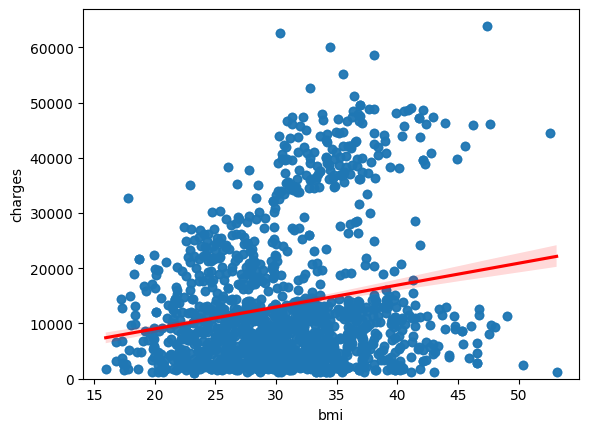

In [16]:
# Simple regression plot with a red trendline BMI vs. Charges
sns.regplot(x='bmi',y='charges',data=df,line_kws={'color':'red'})
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

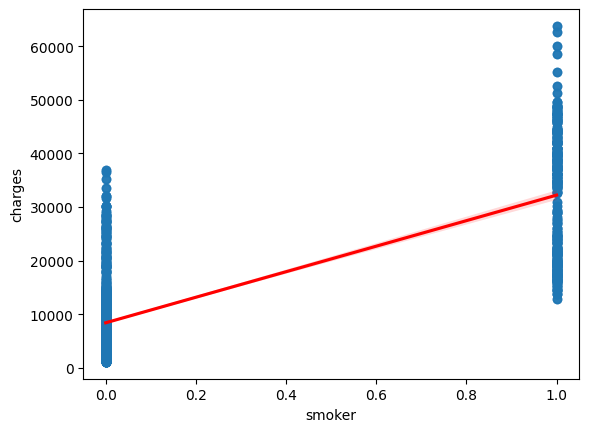

In [32]:
# Simple regression plot with a red trendline smoker vs. Charges
sns.regplot(x='smoker',y='charges',data=df,line_kws={'color':'red'})

In [19]:
# Numeric correlation across all features
print(df.corr())

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026046  0.113048        0.037574 -0.023286   
gender         -0.026046  1.000000  0.042924        0.016020  0.082326   
bmi             0.113048  0.042924  1.000000       -0.001492  0.011489   
no_of_children  0.037574  0.016020 -0.001492        1.000000  0.006362   
smoker         -0.023286  0.082326  0.011489        0.006362  1.000000   
region         -0.007167  0.022213  0.271119       -0.025717  0.054077   
charges         0.298624  0.062837  0.199846        0.066442  0.788783   

                  region   charges  
age            -0.007167  0.298624  
gender          0.022213  0.062837  
bmi             0.271119  0.199846  
no_of_children -0.025717  0.066442  
smoker          0.054077  0.788783  
region          1.000000  0.054058  
charges         0.054058  1.000000  


In [21]:
# Fitting model with a single predictor and report R² on training data(Smoker vs Charges)
lm=LinearRegression()
x=df[['smoker']]
y=df['charges']
lm.fit(x,y)
lm.score(x,y)

0.6221791733924185

In [24]:
# Fitting model using all features except 'charges' as predictors
z=df.drop(df[['charges']],axis=1)
lm.fit(z,y)
lm.score(z,y)

0.7504083820289634

In [26]:
#Polynomial Pipeline
Input=[("Scale",StandardScaler()),("Polynomial",PolynomialFeatures(include_bias=False)),("model",LinearRegression())]
pipe=Pipeline(Input)
z=z.astype(float)
pipe.fit(z,y)
ypipe=pipe.predict(z)
print(r2_score(y,ypipe))

0.8452576213500093


In [27]:
#Train-Test Split (80% training, 20% testing)
x_train,x_test,y_train,y_test=train_test_split(z,y,test_size=0.2,random_state=1)

In [33]:
#Ridge Regression (α = 0.1)
RidgeModel=Ridge(alpha=0.1)
#Fitting on training data and evaluating R² on test set
RidgeModel.fit(x_train,y_train)
yhat=RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6760807731582404


In [34]:
#Polynomial Ridge Regression (degree 2)
pr = PolynomialFeatures(degree=2)
# Transforming predictors to quadratic terms, refitting ridge model
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
#reporting R² on the transformed test set
print(r2_score(y_test,y_hat))



0.783563110760815
